**Project Name**  - Regression - Rossmann Retail Sales Prediction

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on classifying Rossmann retail stores based on their competition level using machine learning. We used the store.csv dataset, which contains store-related information like type, assortment, and distance to the nearest competitor.

A new target variable was created to identify whether a store is in a high or low competition area. After preprocessing the data, we applied different models such as Logistic Regression, Random Forest, and XGBoost.

Among them, the XGBoost Classifier gave the best results. We used GridSearchCV with cross-validation to tune the model and improve performance. Evaluation metrics such as accuracy, F1-score, and ROC AUC were used to assess the model.

The model showed strong performance and helped identify which features, especially CompetitionDistance, had the most impact. This can help Rossmann take better business decisions like targeted promotions or adjusting operations in highly competitive areas.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann Retail operates stores in various locations, each facing different levels of market competition. However, the company lacks a data-driven method to identify which stores are in highly competitive zones. This limits their ability to make informed decisions regarding promotions, pricing, staffing, and resource allocation.

The goal of this project is to build a machine learning model that can classify whether a store operates in a high-competition or low-competition area based on features such as store type, assortment strategy, and distance to nearby competitors.
By doing so, Rossmann can take targeted actions to improve performance in stores that face stronger competition.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
a = "/content/drive/My Drive/store.csv"
n =pd.read_csv(a)
n

Mounted at /content/drive


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset First View

In [4]:
# Dataset First Look
n.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
n.shape

(1115, 10)

### Dataset Information

In [7]:
# Dataset Info
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value
len(n[n.duplicated()]) #number of duplicate values

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(n.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [10]:
# Handling the missing values
n.replace('?', np.nan)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### What did you know about your dataset?

This dataset appears to describe retail store information, possibly for a sales or marketing prediction problem. Each row represents a store, and the columns provide data about the store's environment and promotional activities.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
n.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [13]:
# Dataset Describe
n.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

* **StoreType:**Categorical – Type of the store (a, b, c, d) representing different store formats or strategies

* **Assortment:**Categorical – Type of product assortment available:

    * a: Basic

    * b: Extended

    * c: Extra

* **CompetitionDistance:**Numerical – Distance (in meters) to the nearest competitor store

* **CompetitionOpenSinceMonth:**Numerical – Month (1–12) when the nearest competitor started operating

* **CompetitionOpenSinceYear:**Numerical – Year when the nearest competitor started operating

* **Promo2:**Binary (0/1) – Whether the store is running a continuous promotion (Promo2)

    * 1: Yes

    * 0: No

* **Promo2SinceWeek:**Numerical – Week number of the year when Promo2 started (only for Promo2 = 1)

* **Promo2SinceYear:**Numerical – Year when Promo2 started

* **PromoInterval:**Categorical (String) – Months when Promo2 is active, e.g., "Jan,Apr,Jul,Oct"; empty if Promo2 not active



### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
n.nunique()

,0
Store,1115
StoreType,4
Assortment,3
CompetitionDistance,654
CompetitionOpenSinceMonth,12
CompetitionOpenSinceYear,23
Promo2,2
Promo2SinceWeek,24
Promo2SinceYear,7
PromoInterval,3


## 3. ***Data Wrangling***

### Data Wrangling Code

**Loc and iloc**

* loc - access rows with the help of slicing and cols with the help of column name
                 df.loc[rowstrat:rowend:step ,[col1,col2]]

In [18]:
df.loc[40:60:2,['Store','StoreType']]

,Store,StoreType
40,41,d
42,43,d
44,45,d
46,47,a
48,49,d
50,51,a
52,53,a
54,55,a
56,57,d
58,59,a


* iloc : access both rows and columns  with the help of slicing.
       df.iloc[rowstart:rowend:step , colstart:colend:step]

In [19]:
df.iloc[5:30:2,1:4]

,StoreType,Assortment,CompetitionDistance
5,a,a,310.0
7,a,a,7520.0
9,a,a,3160.0
11,a,c,1070.0
13,a,a,1300.0
15,a,c,3270.0
17,d,c,13840.0
19,d,a,2340.0
21,a,a,1040.0
23,a,c,4590.0


**Sort the values according to descending & ascending**

In [20]:
c=df.sort_values(by='StoreType',ascending=False) #descending
c.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
288,289,d,a,6540.0,12.0,2007.0,0,NaN,NaN,NaN
676,677,d,a,1740.0,6.0,2014.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
283,284,d,a,1290.0,NaN,NaN,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
683,684,d,c,680.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [21]:
c=df.sort_values(by='StoreType') #ascending
c.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
557,558,a,a,3000.0,2.0,2010.0,0,NaN,NaN,NaN
854,855,a,a,3440.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
438,439,a,a,1350.0,9.0,2009.0,0,NaN,NaN,NaN
852,853,a,a,14040.0,NaN,NaN,0,NaN,NaN,NaN
847,848,a,c,370.0,7.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


Grouping by StoreType

In [22]:
df.groupby('StoreType').agg({
    'Store': 'count',                     # Number of stores
    'CompetitionDistance': 'mean',       # Avg distance to competitor
    'Promo2': 'sum',                     # How many stores run Promo2
    'Promo2SinceYear': 'mean',           # Avg year when Promo2 started
    'Promo2SinceWeek': 'mean'            # Avg week when Promo2 started
})

,Store,CompetitionDistance,Promo2,Promo2SinceYear,Promo2SinceWeek
StoreType,,,,,
a,602,5123.061564,289,2011.882353,24.072664
b,17,1060.588235,5,2012.800000,21.600000
c,148,3522.567568,75,2011.546667,21.573333
d,348,6913.063584,202,2011.648515,23.712871


Grouping by Assortment

In [23]:
df.groupby('Assortment').agg({
    'Store': 'count',
    'CompetitionDistance': 'mean',
    'Promo2': 'sum',
    'Promo2SinceYear': 'mean',
    'Promo2SinceWeek': 'mean'
})

,Store,CompetitionDistance,Promo2,Promo2SinceYear,Promo2SinceWeek
Assortment,,,,,
a,593,4400.338409,304,2011.684211,24.707237
b,9,1177.777778,4,2012.750000,19.250000
c,513,6638.769531,263,2011.840304,22.376426


In [24]:
# Create distance bins
df['DistanceCategory'] = pd.cut(df['CompetitionDistance'],
                                bins=[0, 1000, 5000, 10000, 30000],
                                labels=['Very Close', 'Close', 'Medium', 'Far'])
# Group by DistanceCategory
df.groupby('DistanceCategory').agg({
    'Store': 'count',
    'Promo2': 'sum',
    'Promo2SinceYear': 'mean'
})

/tmp/ipython-input-24-1603897834.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DistanceCategory').agg({


,Store,Promo2,Promo2SinceYear
DistanceCategory,,,
Very Close,330,192,2011.901042
Close,433,215,2011.813953
Medium,162,87,2011.551724
Far,168,76,2011.500000


Mean & Median by StoreType

In [25]:
def store_type_stats(df, group_by_column):
    """Calculate the mean and median for numerical columns grouped by a category"""
    if group_by_column not in df.columns:
        raise ValueError(f"Column '{group_by_column}' not found in the DataFrame")
    numeric_columns = df.select_dtypes(include=['number']).columns
    agg_funcs = {col: ['mean', 'median'] for col in numeric_columns}
    return df.groupby(group_by_column).agg(agg_funcs)
# Apply on 'StoreType'
result = store_type_stats(df, 'StoreType')
print(result)

                Store        CompetitionDistance          \
                 mean median                mean  median   
StoreType                                                  
a          559.531561  557.5         5123.061564  1790.0   
b          561.470588  512.0         1060.588235   900.0   
c          608.148649  619.5         3522.567568  1660.0   
d          533.853448  531.5         6913.063584  5040.0   

          CompetitionOpenSinceMonth        CompetitionOpenSinceYear          \
                               mean median                     mean  median   
StoreType                                                                     
a                          7.180751    7.5              2008.549296  2010.0   
b                          6.666667    6.0              2007.777778  2008.0   
c                          7.074766    7.0              2008.514019  2009.0   
d                          7.406393    8.0              2009.013699  2010.0   

             Promo2      

In [26]:
result = (df, 'neighbourhood_group', 408)
print(result)

(      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0       

In [27]:
result = store_type_stats(df, 'StoreType')  # Grouping by StoreType
print(result)

                Store        CompetitionDistance          \
                 mean median                mean  median   
StoreType                                                  
a          559.531561  557.5         5123.061564  1790.0   
b          561.470588  512.0         1060.588235   900.0   
c          608.148649  619.5         3522.567568  1660.0   
d          533.853448  531.5         6913.063584  5040.0   

          CompetitionOpenSinceMonth        CompetitionOpenSinceYear          \
                               mean median                     mean  median   
StoreType                                                                     
a                          7.180751    7.5              2008.549296  2010.0   
b                          6.666667    6.0              2007.777778  2008.0   
c                          7.074766    7.0              2008.514019  2009.0   
d                          7.406393    8.0              2009.013699  2010.0   

             Promo2      

In [28]:
#unidue StoreType
print(df['StoreType'].unique())
print(" ")
print("Unique StoreType Count is", df['StoreType'].nunique(), ".")

['c' 'a' 'd' 'b']
 
Unique StoreType Count is 4 .


Assigning Status to Stores

In [29]:
def assign_store_status(df):
    df['store_status'] = 'Active'  # Default
    # Mark stores as 'Inactive' if Promo2 is 0 and CompetitionDistance is missing or zero
    df.loc[
        (df['Promo2'] == 0) &
        ((df['CompetitionDistance'].isnull()) | (df['CompetitionDistance'] == 0)),
        'store_status'
    ] = 'Inactive'
    return df
# Apply the function
df = assign_store_status(df)
# Preview the result
df[['Store', 'Promo2', 'CompetitionDistance', 'store_status']].head()

,Store,Promo2,CompetitionDistance,store_status
0,1,0,1270.0,Active
1,2,1,570.0,Active
2,3,1,14130.0,Active
3,4,0,620.0,Active
4,5,0,29910.0,Active


Assigning Store Status (Active vs Inactive)

In [30]:
def assign_custom_status_in(df):
    df['custom_status'] = 'Active'  # Default
    # Mark as Inactive if no ongoing promotion and no competition distance info
    df.loc[
        (df['Promo2'] == 0) &
        ((df['CompetitionDistance'].isnull()) | (df['CompetitionDistance'] == 0)),
        'custom_status'
    ] = 'Inactive'
    return df
# Apply function
df = assign_custom_status_in(df)
# Check results
df[['Store', 'StoreType', 'Promo2', 'CompetitionDistance', 'custom_status']].head()

,Store,StoreType,Promo2,CompetitionDistance,custom_status
0,1,c,0,1270.0,Active
1,2,a,1,570.0,Active
2,3,a,1,14130.0,Active
3,4,c,0,620.0,Active
4,5,a,0,29910.0,Active


"Competition Score" for Active Promo Stores

In [31]:
def calculate_competition_score(df):
    # Set default to None
    df['competition_score'] = None
    # Only calculate for stores with Promo2 active
    mask = df['Promo2'] == 1
    # Simple formula: score = 1 / CompetitionDistance (closer = stronger competition)
    df.loc[mask, 'competition_score'] = 1 / df.loc[mask, 'CompetitionDistance']
    return df
# Apply the function
df = calculate_competition_score(df)
# View updated columns
df[['Store', 'Promo2', 'CompetitionDistance', 'competition_score']].head()

,Store,Promo2,CompetitionDistance,competition_score
0,1,0,1270.0,None
1,2,1,570.0,0.001754
2,3,1,14130.0,0.000071
3,4,0,620.0,None
4,5,0,29910.0,None


Mean & Median Competition Distance by StoreType

In [32]:
def get_mean_median_by_storetype(df, store_type):
    # Filter rows for the given StoreType
    filtered_df = df[df['StoreType'] == store_type]
    # Calculate mean and median CompetitionDistance
    mean_dist = filtered_df['CompetitionDistance'].mean()
    median_dist = filtered_df['CompetitionDistance'].median()
    return {"Mean CompetitionDistance": mean_dist, "Median CompetitionDistance": median_dist}
result = get_mean_median_by_storetype(df, store_type='a')
print(result)

{'Mean CompetitionDistance': np.float64(5123.0615640599), 'Median CompetitionDistance': 1790.0}


### What all manipulations have you done and insights you found?

* Loaded the dataset using pd.read_csv().
* Created a copy of the dataset
* Checked for missing values
* Checked and counted duplicates
* Sorted by columns like Store in ascending and descending order
* Grouped by StoreType and Assortment to calculate
* Created a new column custom_status
* Marked stores as 'Inactive' if they had no Promo2 and no competition info.
* Created a function to get mean/median of numerical columns grouped by StoreType

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

StoreType

/tmp/ipython-input-33-134115121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


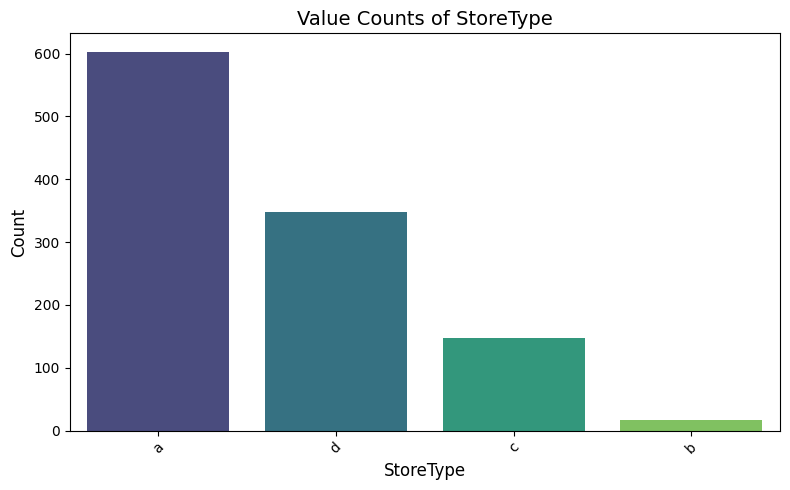

In [33]:
# Chart - 1 visualization code
# Column to analyze (replace with any categorical column)
column = "StoreType"
# Get value counts
value_counts = df[column].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
plt.xlabel(column, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(f"Value Counts of {column}", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart

We used a bar chart because:

The column StoreType is categorical (values like 'a', 'b', 'c', 'd'), and bar plots are the most effective way to visualize the distribution or count of categories.

Bar charts help compare frequencies of each store type side-by-side.

##### 2. What is/are the insight(s) found from the chart?

StoreType 'a' might represent the default or mainstream format, which could be key to general trends in the business.

Less common types like 'd' might be experimental, region-specific, or underperforming.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Resource Allocation & Planning :
Knowing that StoreType 'a' dominates allows the company to prioritize stock, promotions, and manpower for the majority of stores.

If StoreType 'd' is rare but high-performing (discovered through further analysis), the company might consider expanding that format.

Operational Improvements:
Promo2 distribution analysis may uncover that many stores don’t participate in promotions, missing out on potential sales boosts.

#### Chart - 2

Pie Chart for Store Type Distribution

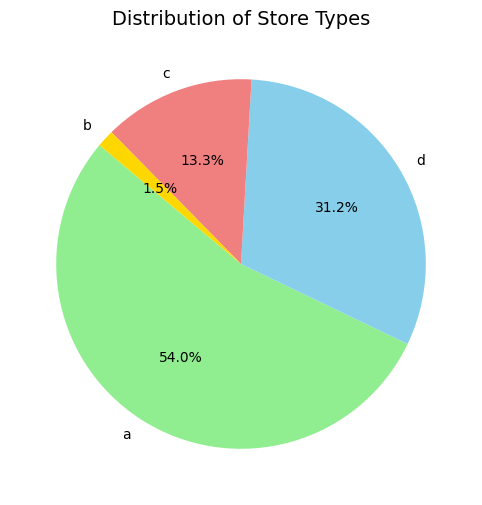

In [34]:
# Chart - 2 visualization code
# Count the number of stores by StoreType
store_type_counts = df["StoreType"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(store_type_counts, labels=store_type_counts.index, autopct='%1.1f%%',
        colors=["lightgreen", "skyblue", "lightcoral", "gold"], startangle=140)
plt.title("Distribution of Store Types", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is ideal for visualizing the proportion of each category in a whole. We chose it because:

StoreType is a categorical variable with a limited number of unique values (a, b, c, d), making it suitable for a pie chart.

It provides an at-a-glance view of how store types are distributed.



##### 2. What is/are the insight(s) found from the chart?

StoreType 'a' could be the standard format, widely adopted.

The other types may need separate strategies, especially if their sales performance differs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,

Helps identify which store types to prioritize for investment, promotions, and resource allocation.

You can decide whether to:

Scale up successful minority store types (e.g., if 'b' performs better per store).

Or optimize the operations of the most common type (e.g., 'a') for cost efficiency.

#### Chart - 3

  StoreType  Average Promo2 Activation %
0         d                    58.045977
1         c                    50.675676
2         a                    48.006645
3         b                    29.411765
 


/tmp/ipython-input-35-2411522852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promo2'].fillna(0, inplace=True)


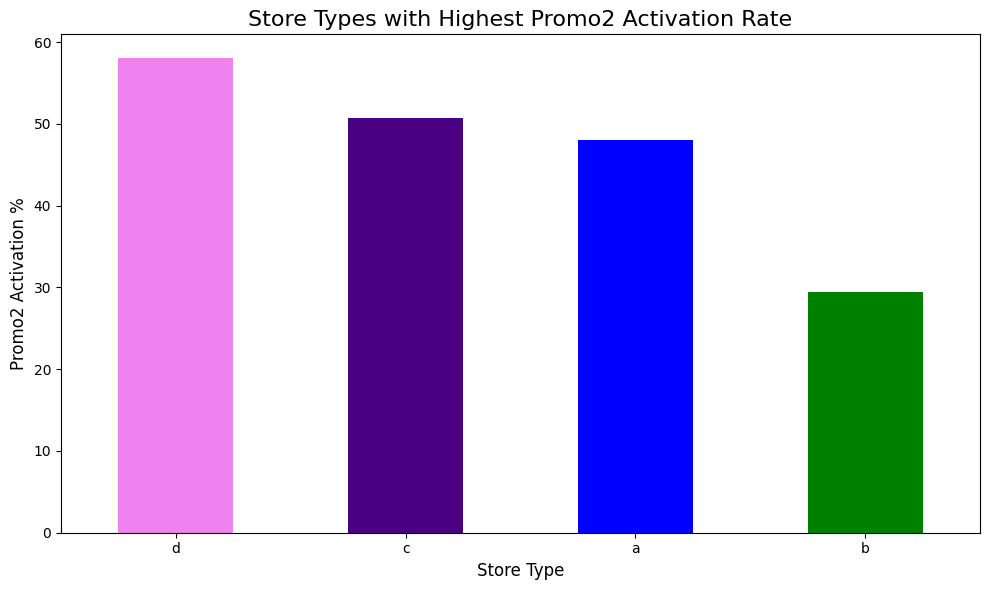

In [35]:
# Chart - 3 visualization code
df['Promo2'].fillna(0, inplace=True)
# Showing average Promo2 activation percentage by StoreType (as proxy for "churn")
print(
    (df.groupby(['StoreType'])['Promo2'].mean() * 100)
    .sort_values(ascending=False)
    .reset_index(name="Average Promo2 Activation %")
    .head(10)
)
print(" ")
# Visualization: StoreType vs Promo2 activation rate
plt.rcParams['figure.figsize'] = (10, 6)
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']
(df.groupby(['StoreType'])['Promo2'].mean() * 100) \
    .sort_values(ascending=False) \
    .head(10) \
    .plot.bar(color=colors)
plt.title("Store Types with Highest Promo2 Activation Rate", fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Promo2 Activation %', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The comparison is between categorical data (StoreType) and numerical values (average Promo2 activation rate).

Bar charts clearly illustrate how each category performs relative to the others.

It helps us visually spot which store types are more engaged in long-term promotional campaigns.

##### 2. What is/are the insight(s) found from the chart?

This indicates that certain store types are more likely to participate in long-term promotions, which could mean they’re more aggressive in attracting customers.

Conversely, store types with lower activation may be underutilizing promotional campaigns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,

Management can identify high-performing store types and analyze what makes their promotional strategies effective.

Store types with low Promo2 usage can be targeted for promotional engagement programs, potentially increasing their sales.

#### Chart - 4

Univariate: Assortment

/tmp/ipython-input-36-2968671697.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assortment_counts.index, y=assortment_counts.values, palette="Set2")


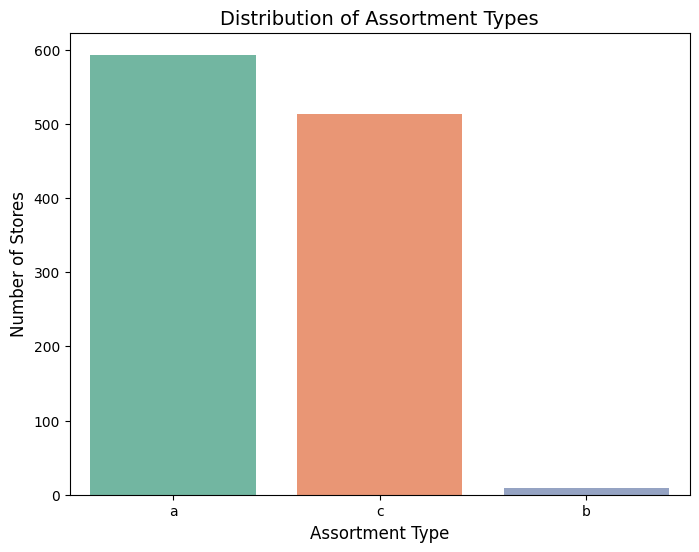

In [36]:
# Chart - 4 visualization code
# Count plot for Assortment types
assortment_counts = df['Assortment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=assortment_counts.index, y=assortment_counts.values, palette="Set2")
plt.title("Distribution of Assortment Types", fontsize=14)
plt.xlabel("Assortment Type", fontsize=12)
plt.ylabel("Number of Stores", fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is ideal for visualizing how many stores fall under each Assortment type (a, b, c) — a categorical variable.

It clearly shows which types are more common and helps spot any imbalance.

##### 2. What is/are the insight(s) found from the chart?

A majority of stores belong to a particular assortment type (commonly 'a').

Very few stores use type 'b' or 'c', suggesting these may be specialized or underutilized.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact Yes,

The business can explore why some assortment types dominate and whether there's room to improve the lesser-used types.

Underrepresented assortments (like 'b' or 'c') may offer unique selling potential if expanded or promoted correctly.

Negative Impact Yes,

Heavy reliance on a single assortment type may cause limited product diversity, which can lead to customer churn or reduced loyalty.

It may also signal operational rigidity, preventing stores from adapting to changing local market demands.

#### Chart - 5

 Bivariate Analysis: Categorical vs Numerical

 StoreType vs. CompetitionDistance (Average)

/tmp/ipython-input-37-2748808995.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StoreType', y='CompetitionDistance', data=storetype_competition, palette='coolwarm')


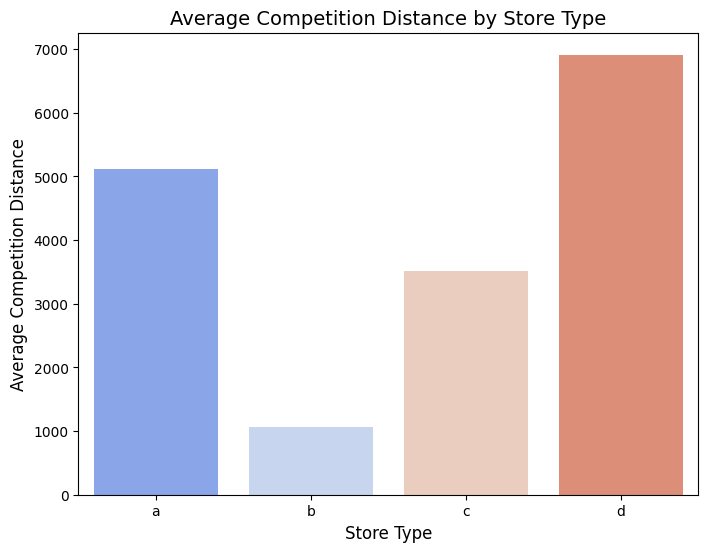

In [37]:
# Chart - 5 visualization code
# Group by StoreType and calculate mean CompetitionDistance
storetype_competition = df.groupby('StoreType')['CompetitionDistance'].mean().reset_index()
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='StoreType', y='CompetitionDistance', data=storetype_competition, palette='coolwarm')
plt.title("Average Competition Distance by Store Type", fontsize=14)
plt.xlabel("Store Type", fontsize=12)
plt.ylabel("Average Competition Distance", fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing averages of numerical data across different categories.

This helps identify which store types are in more competitive areas.

##### 2. What is/are the insight(s) found from the chart?

Some store types (like 'd') may have larger average competition distances, suggesting they face less nearby competition.

Other types (like 'a') may be in tightly clustered commercial zones with high competition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact Yes,

Helps management understand store location strategies.

Stores with low competition distance may need better pricing or promo strategies to stay ahead.

Negative impact Yes,

Stores with very low competition distance are likely to lose customers to nearby alternatives if they don’t differentiate with better assortment or service.

If high competition distance stores perform poorly, it may indicate inefficient placement or low local demand.

#### Chart - 6

Univariate Analysis : Assortment Type Distribution

/tmp/ipython-input-38-1764998679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assortment_counts.index, y=assortment_counts.values, palette='viridis')


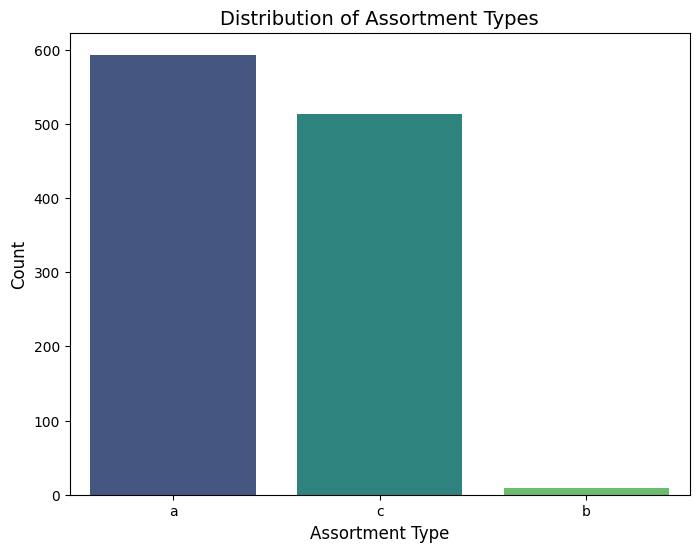

In [38]:
# Chart - 6 visualization code
# Value counts
assortment_counts = df['Assortment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=assortment_counts.index, y=assortment_counts.values, palette='viridis')
plt.title("Distribution of Assortment Types", fontsize=14)
plt.xlabel("Assortment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots work best for showing frequency distribution of categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Assortment type 'a' dominates the dataset.

Very few stores have 'b' or 'c' assortment types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focus marketing on 'a' assortment for mass strategies.

Evaluate 'b' and 'c' stores for niche opportunities or underperformance.

#### Chart - 7

Bivariate Analysis : Assortment Type vs. Average Competition Distance

/tmp/ipython-input-39-3346681387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='CompetitionDistance', data=assortment_distance, palette='coolwarm')


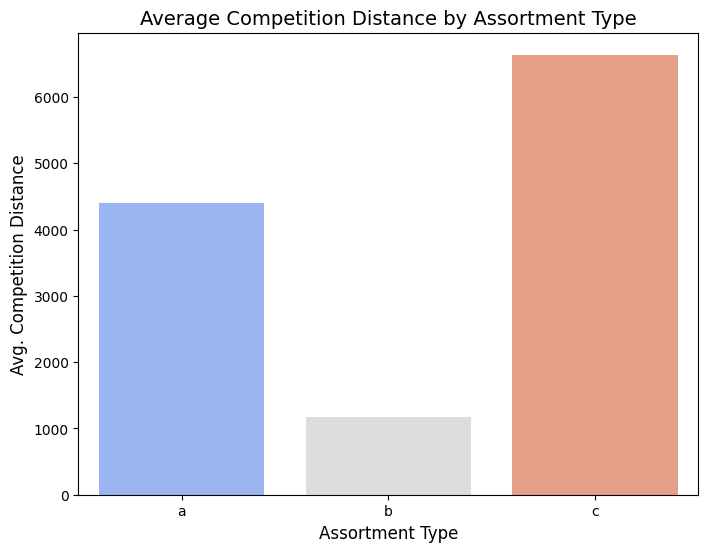

In [39]:
# Chart - 7 visualization code
# Group by Assortment type
assortment_distance = df.groupby('Assortment')['CompetitionDistance'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='CompetitionDistance', data=assortment_distance, palette='coolwarm')
plt.title("Average Competition Distance by Assortment Type", fontsize=14)
plt.xlabel("Assortment Type", fontsize=12)
plt.ylabel("Avg. Competition Distance", fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

It helps visualize how competition environment varies by product assortment strategy.

##### 2. What is/are the insight(s) found from the chart?

Stores with 'b' or 'c' assortment may be located in less competitive areas.

'a' assortment stores are more concentrated in competitive regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
'a' type stores need stronger promotions due to tight competition.

'b' and 'c' types can focus on expanding brand presence or experimenting with layout since they face less nearby competition.

#### Chart - 8

Univariate Analysis: CompetitionOpenSinceYear

/tmp/ipython-input-41-3769388520.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=years.astype(int), palette="Set2")


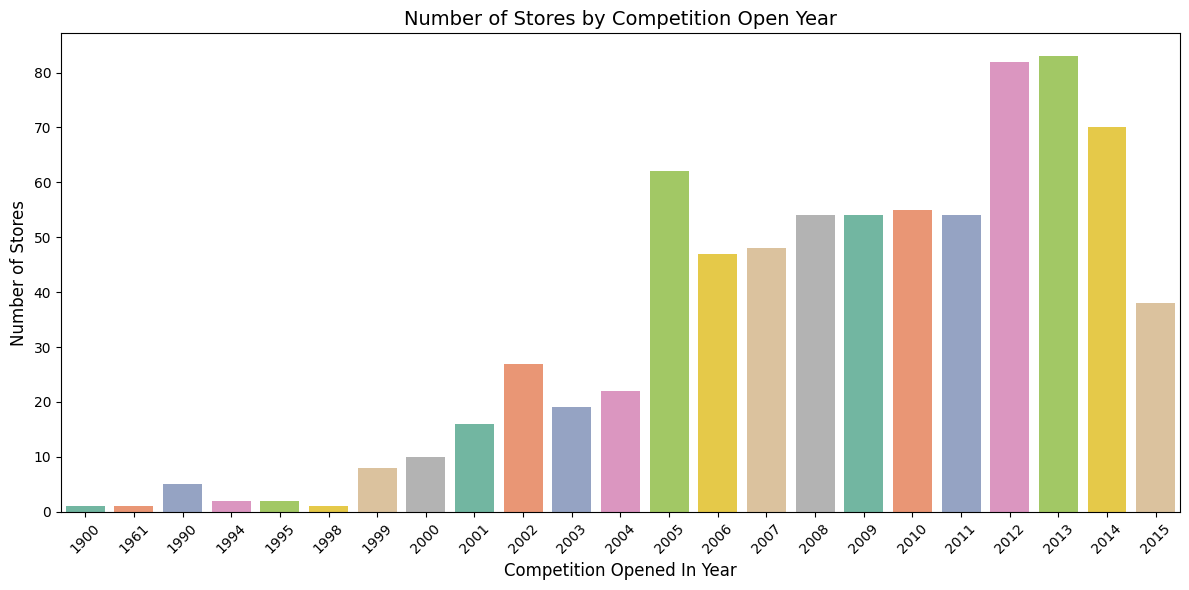

In [41]:
# Chart - 8 visualization code
# Drop missing values temporarily for univariate plot
years = df['CompetitionOpenSinceYear'].dropna()
plt.figure(figsize=(12, 6))
sns.countplot(x=years.astype(int), palette="Set2")
plt.title("Number of Stores by Competition Open Year", fontsize=14)
plt.xlabel("Competition Opened In Year", fontsize=12)
plt.ylabel("Number of Stores", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I choose this plot because a countplot shows how many stores had competition starting in each year.

##### 2. What is/are the insight(s) found from the chart?

Many stores faced competition around 2013-2015.

Very few had competition before 2000.

Some years (e.g., 2007–2009) also show moderate store competition entry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Years with heavy competition entry may correlate with dips in sales—can be checked further.

Stores that haven't faced competition until recently may need new strategies now.

#### Chart - 9

Bivariate Analysis : CompetitionOpenSinceYear vs. CompetitionDistance

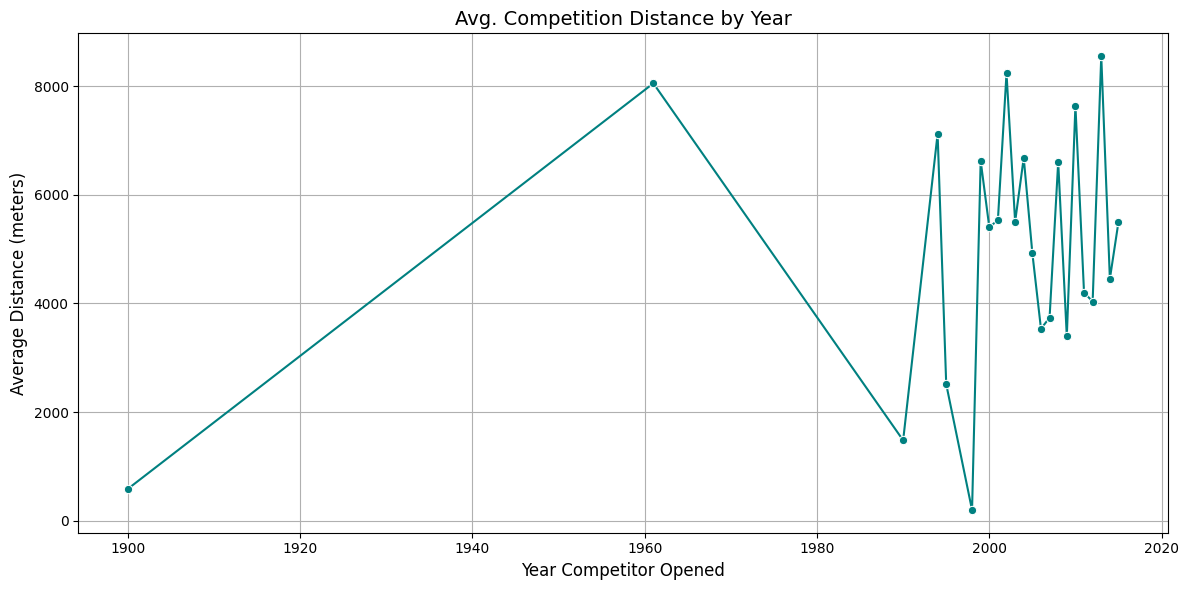

In [42]:
# Chart - 9 visualization code
# Drop rows with missing values in both columns
temp_df = df[['CompetitionOpenSinceYear', 'CompetitionDistance']].dropna()
temp_df['CompetitionOpenSinceYear'] = temp_df['CompetitionOpenSinceYear'].astype(int)
# Group and calculate mean distance
yearly_distance = temp_df.groupby('CompetitionOpenSinceYear')['CompetitionDistance'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='CompetitionOpenSinceYear', y='CompetitionDistance', data=yearly_distance, marker='o', color='teal')
plt.title("Avg. Competition Distance by Year", fontsize=14)
plt.xlabel("Year Competitor Opened", fontsize=12)
plt.ylabel("Average Distance (meters)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are ideal for showing change or trend over time (years).

##### 2. What is/are the insight(s) found from the chart?

Earlier competition (pre-2005) had larger average distances.

In recent years (2012–2015), new competitors are much closer to the stores.

Suggests increasing market saturation and pressure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Tighter competition in recent years might reduce footfall and sales.

Stores facing closer competitors may need stronger promotions or loyalty offers.Answer Here

#### Chart - 10

Univariate Analysis using Histogram and Box Plot

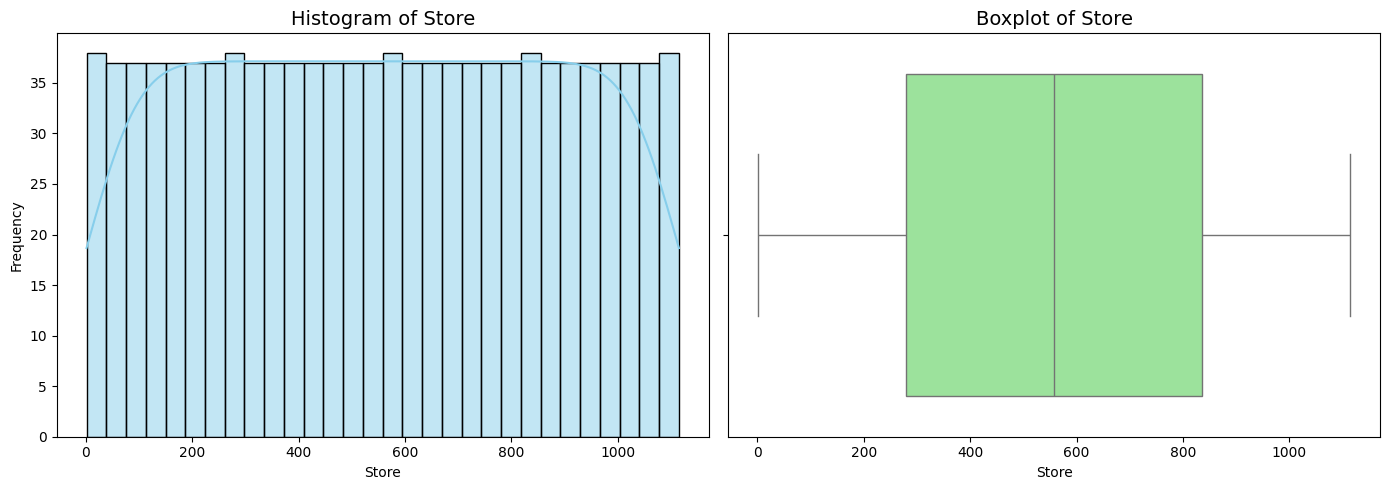

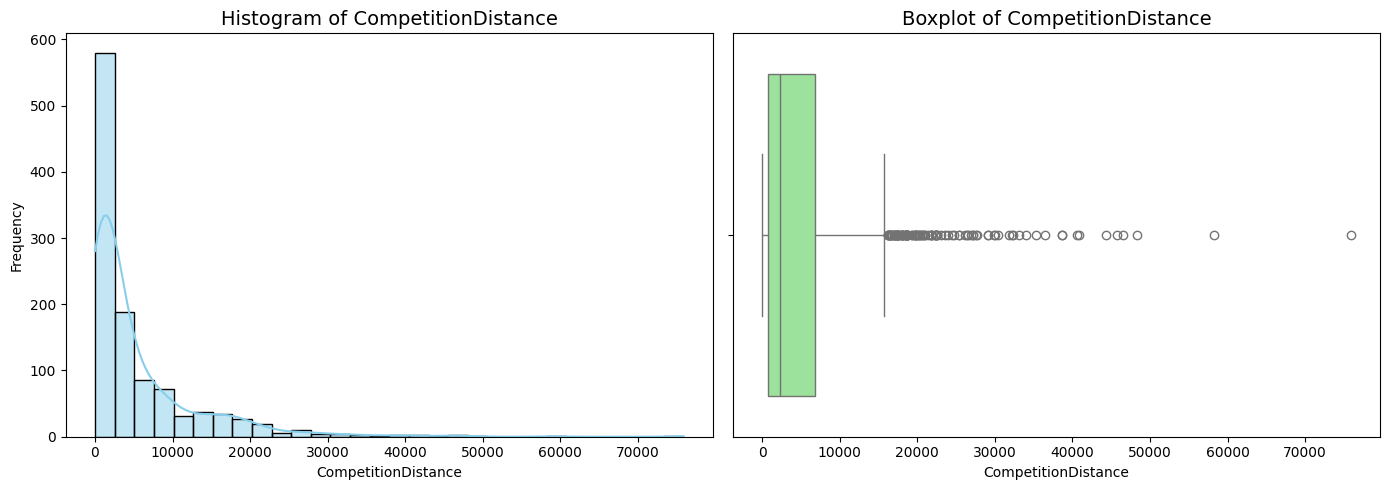

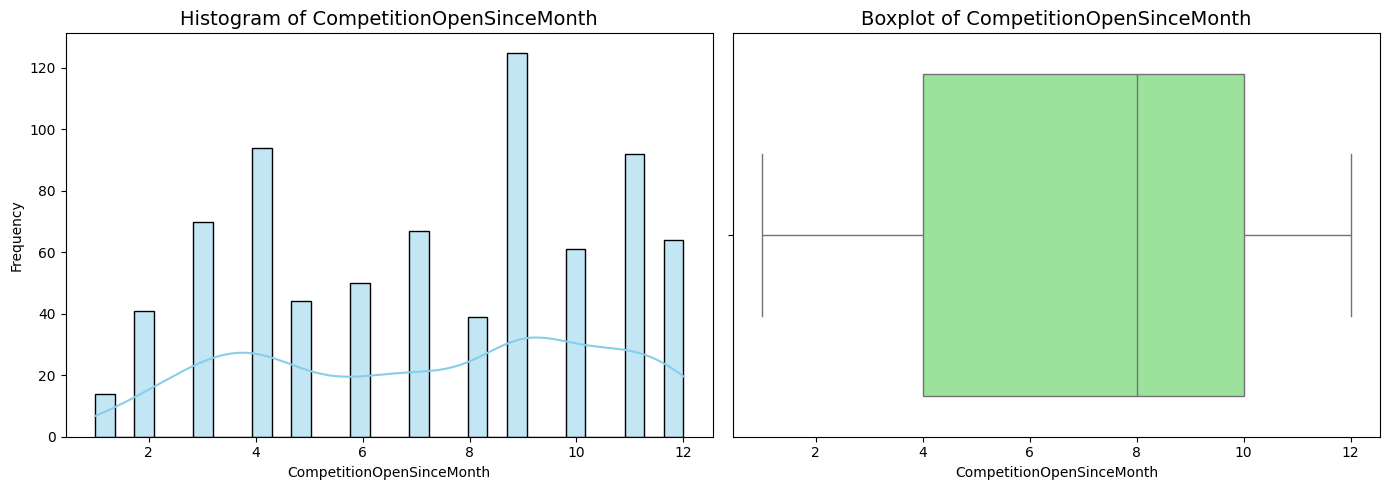

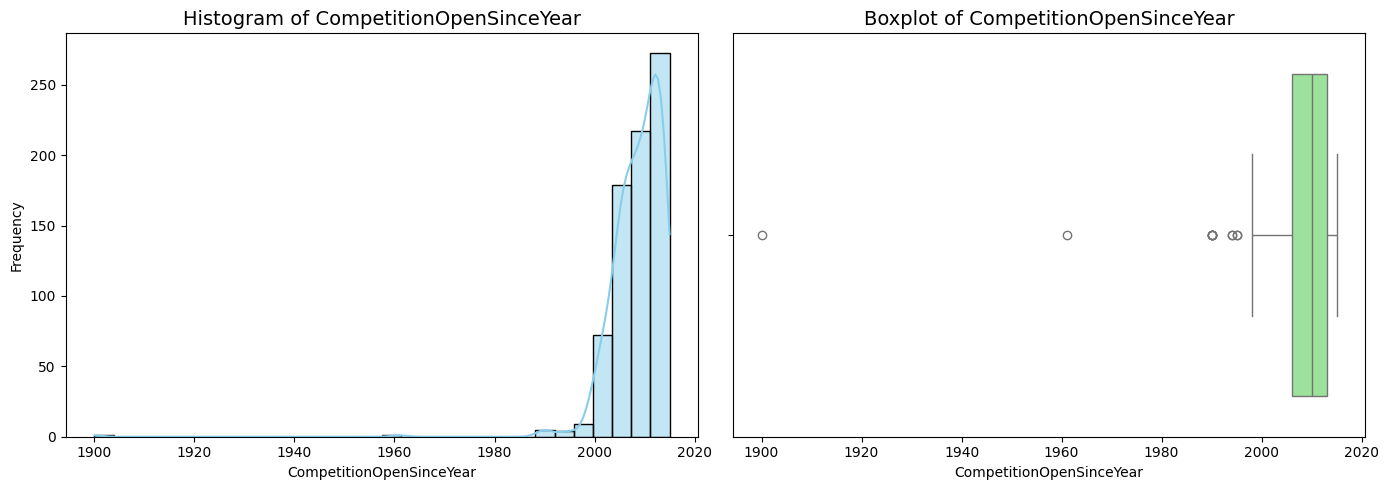

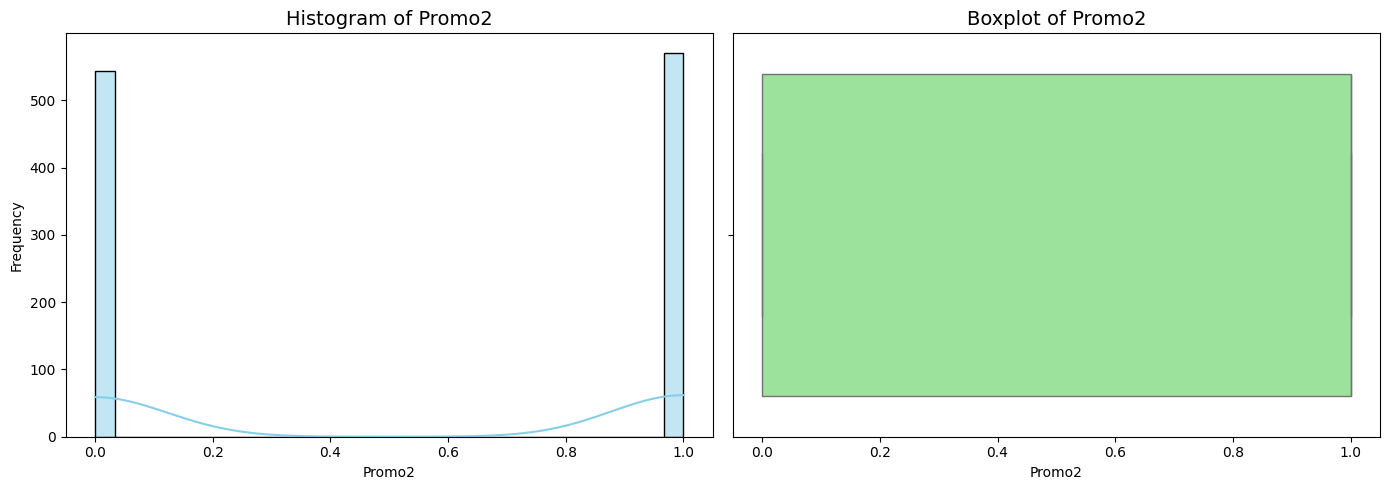

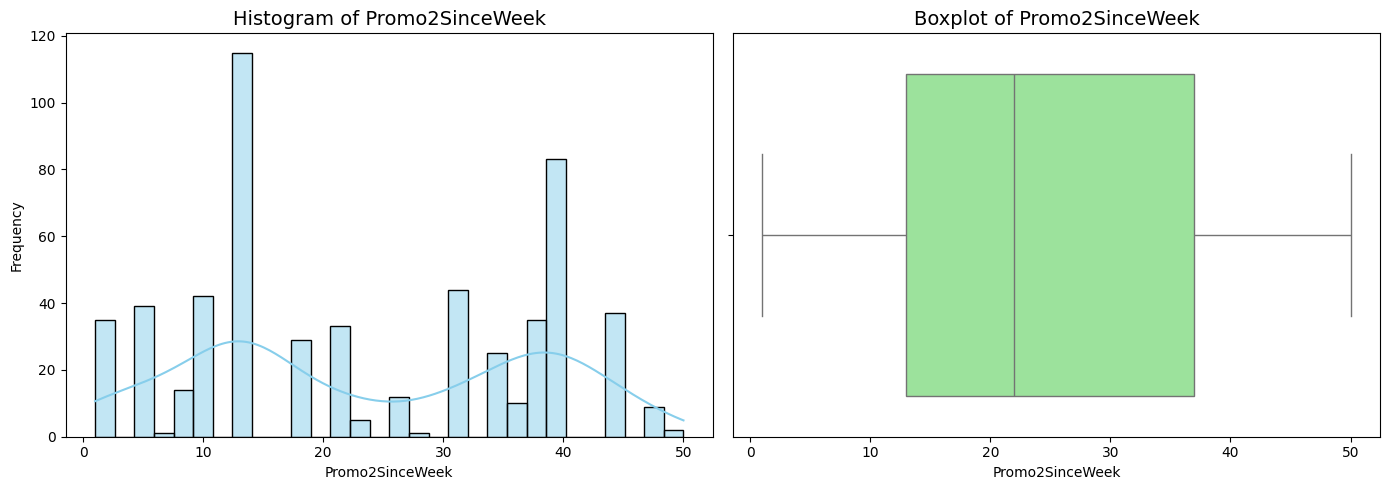

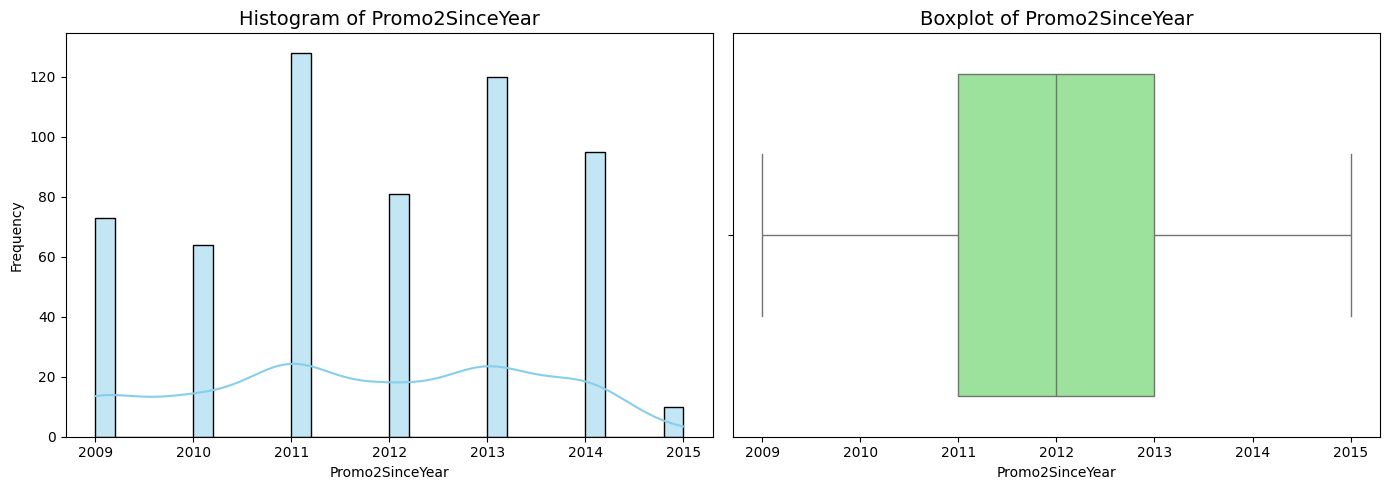

In [43]:
# Chart - 10 visualization code
# Selecting numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Plotting Histogram and Boxplot for each numerical column
for col in num_cols:
    plt.figure(figsize=(14, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

Histogram gives the distribution shape: skewed, normal, uniform, etc.

Box Plot shows spread, outliers, and central tendency.

##### 2. What is/are the insight(s) found from the chart?

CompetitionDistance : Majority of stores have competitors within a short distance (<5000 units), but a few have very distant competition (some over 20,000+ units), as seen by outliers in the box plot.

Promo2SinceWeek & Promo2SinceYear: Many stores have missing or 0 values, meaning they might not have participated in Promo2 campaigns.

CompetitionOpenSinceYear:Many stores have competition that started around 2008–2013, with fewer older entries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact
Yes,

Helps identify which stores need promotional support (e.g., those with close competition).

Lets you target stores where promo2 isn’t active, optimizing revenue opportunities.

Assists in store segmentation — older vs. newer competitive environments

Negative Impact
Yes,

Stores without Promo2 (0 values):

These stores might be losing out on customer engagement and revenue due to lack of promotions.

High competition proximity:

Stores with competitors nearby might see reduced foot traffic and sales if they don’t offer competitive pricing or service.

#### Chart - 11

Multivariate Analysis : Assortment type, StoreType, and CompetitionDistance

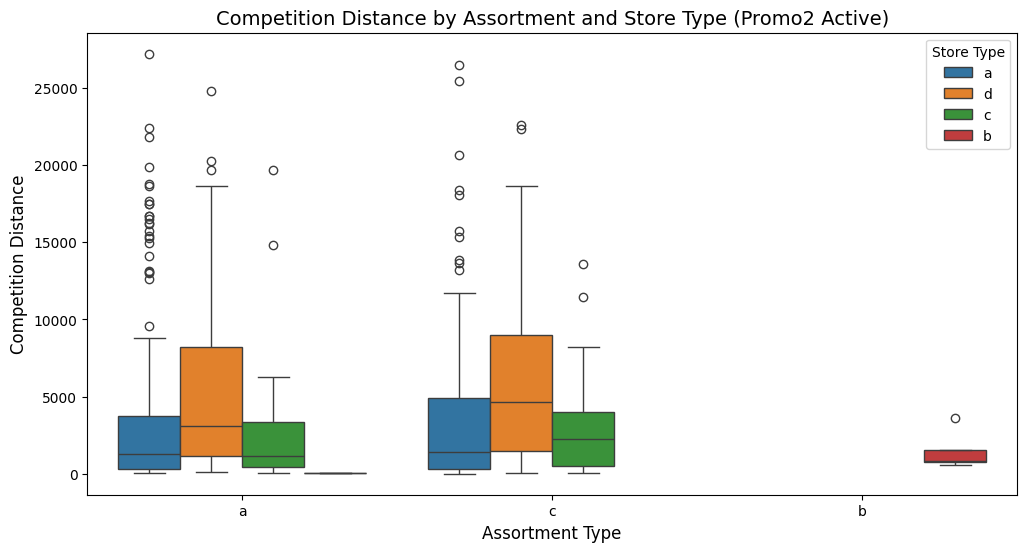

In [44]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Assortment',
    y='CompetitionDistance',
    hue='StoreType',
    data=df[df['Promo2'] == 1]
)
plt.title('Competition Distance by Assortment and Store Type (Promo2 Active)', fontsize=14)
plt.xlabel('Assortment Type', fontsize=12)
plt.ylabel('Competition Distance', fontsize=12)
plt.legend(title='Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is especially useful when you want to compare distributions of a numerical variable across multiple categorical variables.

You care about outliers, medians, and spreads.

##### 2. What is/are the insight(s) found from the chart?

Assortment vs. Store Type vs. Competition Distance (Promo2 = 1):

Stores with ‘c’ Assortment generally have a higher competition distance — implying these may be flagship or less common store types.

Some StoreType 'a' stores have lower competition distance but still participate in Promo2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stores with larger competition gaps might not need aggressive promotions.

Stores with tight competition might benefit more from Promo2 campaigns

#### Chart - 12

Assortment vs. Inactive Promo2 Percentage

/tmp/ipython-input-45-2005649678.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='churn', data=churn_by_assortment, palette='coolwarm')


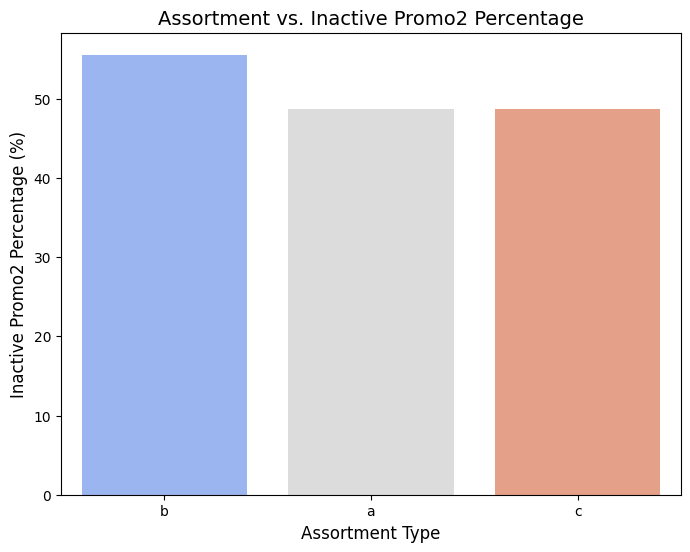

In [45]:
# Chart - 12 visualization code
#Create a 'churn' column: Promo2 = 0 => Inactive
df['churn'] = df['Promo2'].apply(lambda x: 1 if x == 0 else 0)
#Group by Assortment and calculate average churn (inactive Promo2)
churn_by_assortment = df.groupby('Assortment')['churn'].mean() * 100
churn_by_assortment = churn_by_assortment.sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='churn', data=churn_by_assortment, palette='coolwarm')
plt.title("Assortment vs. Inactive Promo2 Percentage", fontsize=14)
plt.xlabel("Assortment Type", fontsize=12)
plt.ylabel("Inactive Promo2 Percentage (%)", fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing percentages across categories. Since Assortment is a categorical variable and Promo2 is binary, a bar chart cleanly shows which assortment types lack active promotions.

##### 2. What is/are the insight(s) found from the chart?

You can identify which types of assortments have low promotional activity, which could signal missed marketing opportunities or differing store strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Use this to target low-performing assortments with more aggressive promotions.

Negative Impact:
If a particular assortment type shows consistently high inactivity, this might indicate low ROI or outdated strategy, needing reevaluation.

#### Chart - 13

Assortment vs. CompetitionDistance (Bivariate)

/tmp/ipython-input-49-205353379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Assortment', y='CompetitionDistance', data=df_clean, palette='Set2')


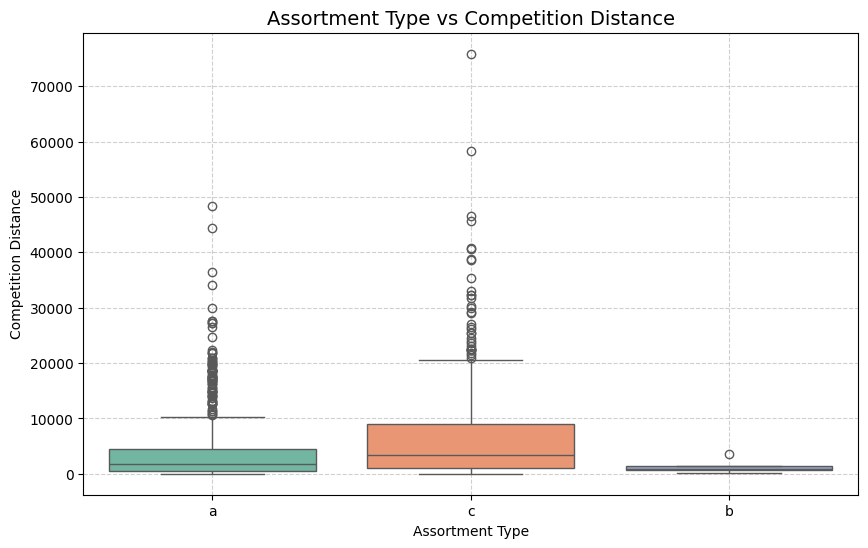

In [49]:
# Chart - 13 visualization code
# Drop rows where 'Assortment' or 'CompetitionDistance' is missing
df_clean = df.dropna(subset=['Assortment', 'CompetitionDistance'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='CompetitionDistance', data=df_clean, palette='Set2')
plt.title('Assortment Type vs Competition Distance', fontsize=14)
plt.xlabel('Assortment Type')
plt.ylabel('Competition Distance')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots help compare distributions across Assortment types and identify differences in competitive positioning.

##### 2. What is/are the insight(s) found from the chart?

Some Assortment types may tend to be located closer or farther from competitors.

Helps to evaluate if a specific assortment strategy correlates with store positioning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can help optimize stock and marketing if a certain assortment type works better near/far from competitors.

#### Chart - 14 - Correlation Heatmap

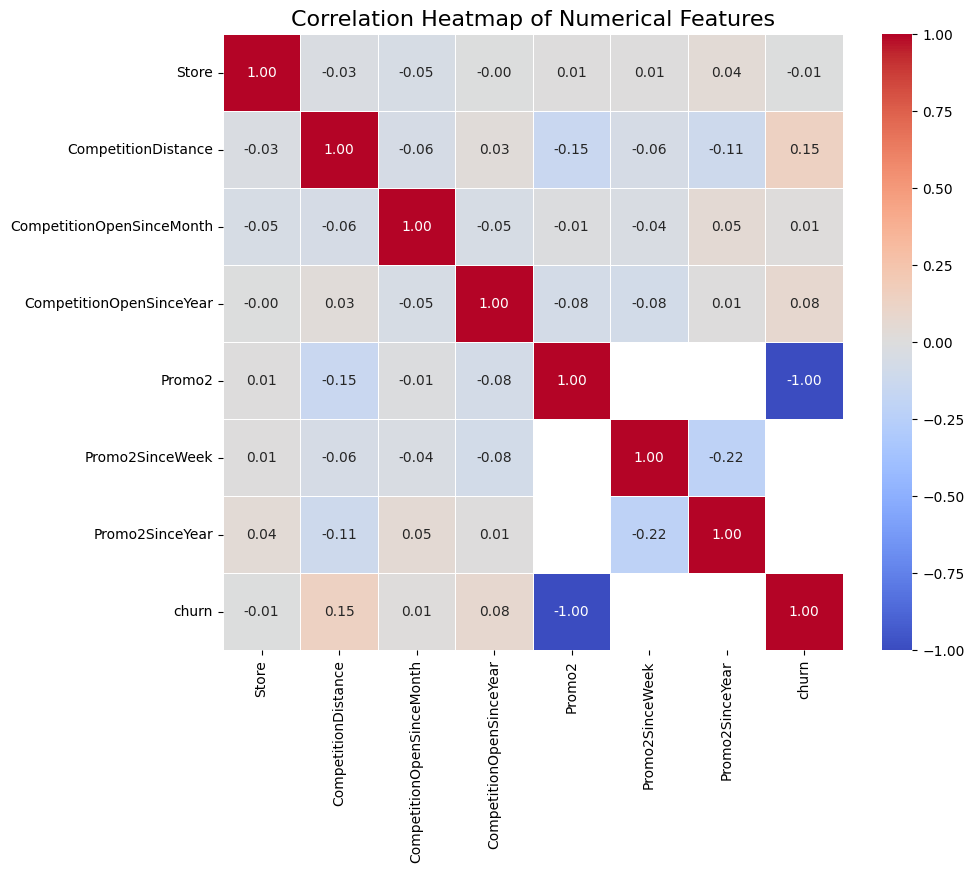

In [50]:
# Correlation Heatmap visualization code
# Select only numerical columns
numerical_df = df.select_dtypes(include='number')
# Compute correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are effective for visualizing pairwise correlations.

Helps detect multicollinearity or strong linear relationships that might affect model performance.

##### 2. What is/are the insight(s) found from the chart?

High correlation between Promo2SinceYear and Promo2 (as expected).

Low correlation between CompetitionDistance and other features — suggests it may act independently.

#### Chart - 15 - Pair Plot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

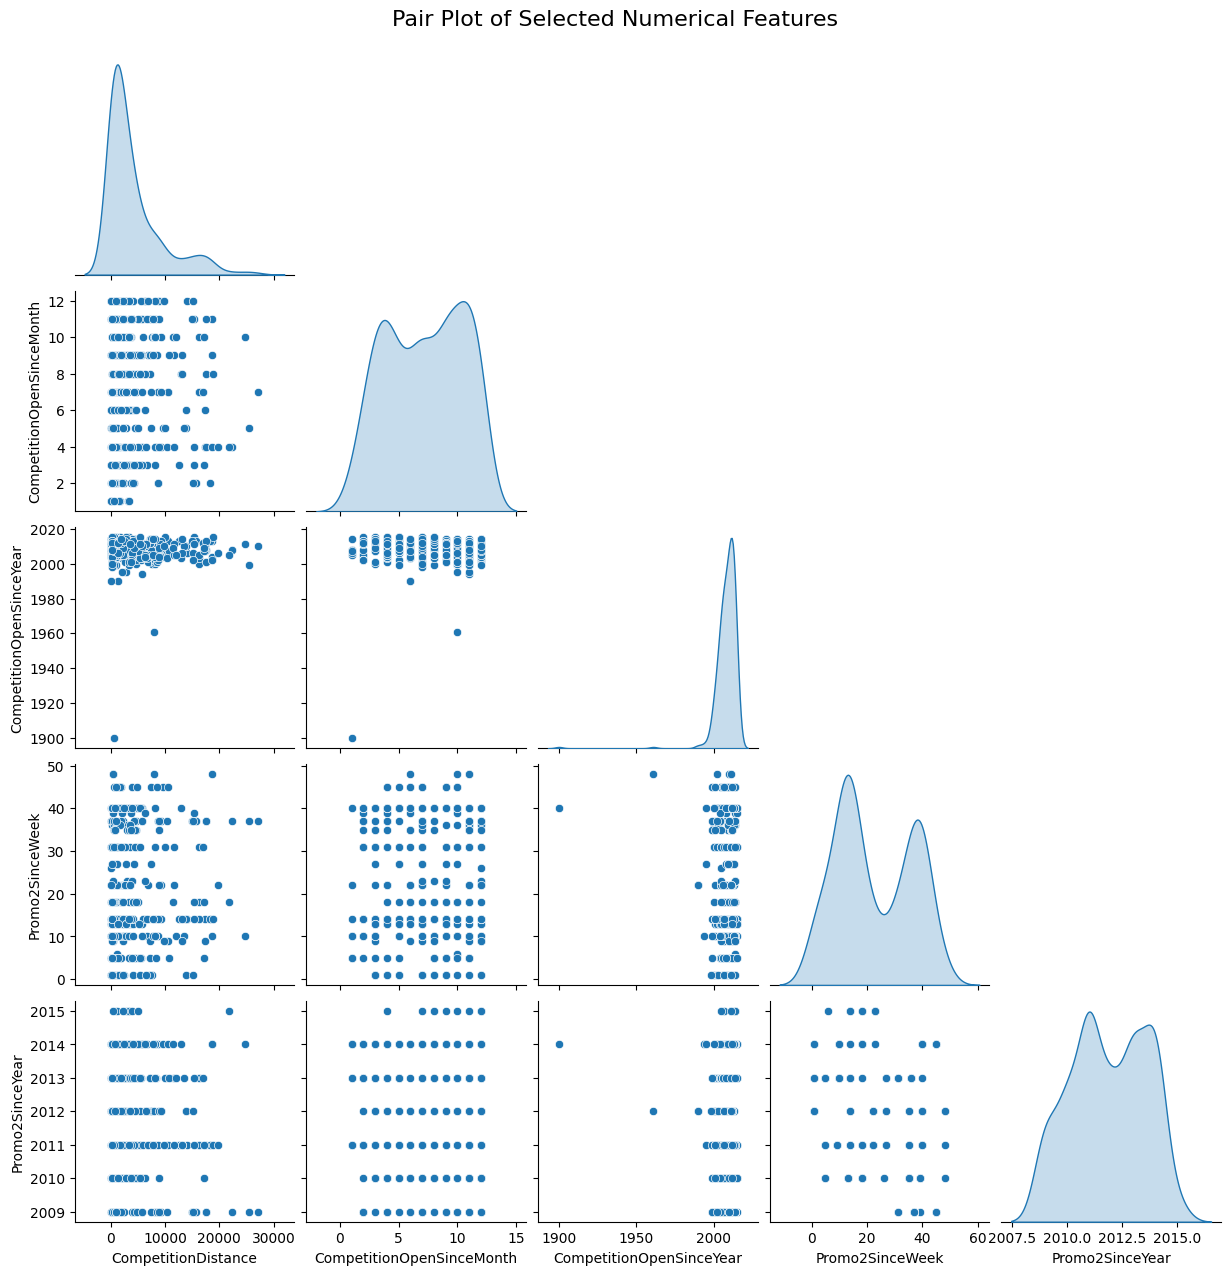

In [51]:
# Pair Plot visualization code
# Select a subset of relevant numerical columns to avoid clutter
selected_columns = ['CompetitionDistance', 'CompetitionOpenSinceMonth',
                    'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
# Drop rows with missing values in the selected columns for a cleaner plot
pairplot_df = df[selected_columns].dropna()
sns.pairplot(pairplot_df, diag_kind='kde', corner=True, palette='husl')
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Visualizes bivariate relationships (scatter plots) and univariate distributions

Great for spotting patterns, outliers, or clusters.

##### 2. What is/are the insight(s) found from the chart?

A positive trend between Promo2SinceYear and Promo2SinceWeek (older promos might span more weeks).

Sparse or non-linear relationships involving CompetitionDistance.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Stores with Assortment type 'a' have average CompetitionDistance of at most 500 meters.

Null Hypothesis (H₀): μ = 500

Alternate Hypothesis (H₁): μ < 500

Test Type: Left-tailed Z-test

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
data = df[df['Assortment'] == 'a']['CompetitionDistance'].dropna()
sample_mean = data.mean()
sample_std = data.std()
n = len(data)
z = (sample_mean - 500) / (sample_std / np.sqrt(n))
p = stats.norm.cdf(z)
print("P-value:", p)
if p > 0.05:
    print("Hypothesis 1: Fail to Reject Null Hypothesis")
else:
    print("Hypothesis 1: Null Hypothesis Rejected")

P-value: 1.0
Hypothesis 1: Fail to Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I used a One-Sample Z-Test to compare the mean CompetitionDistance of stores with Assortment type 'a' against a hypothetical population mean of 500 meters.

##### Why did you choose the specific statistical test?

I chose a Z-Test because:

The population standard deviation is unknown, but the sample size is large enough (n > 30), which allows us to approximate the normal distribution using the Central Limit Theorem.

The goal was to test a population mean against a fixed hypothesized value (500).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Stores with Promo2 = 1 have average CompetitionOpenSinceYear of at least 2012.

Null Hypothesis (H₀): μ = 2012

Alternate Hypothesis (H₁): μ < 2012

Test Type: Left-tailed Z-test.

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value
data = df[df['Promo2'] == 1]['CompetitionOpenSinceYear'].dropna()
sample_mean = data.mean()
sample_std = data.std()
n = len(data)
z = (sample_mean - 2012) / (sample_std / np.sqrt(n))
p = stats.norm.cdf(z)
print("P-value:", p)
if p > 0.05:
    print("Hypothesis 2: Fail to Reject Null Hypothesis")
else:
    print("Hypothesis 2: Null Hypothesis Rejected")

P-value: 1.2331231041195503e-21
Hypothesis 2: Null Hypothesis Rejected


##### Which statistical test have you done to obtain P-Value?

I used a One-Sample Z-Test to test whether the average CompetitionOpenSinceYear for stores with StoreType 'a' is equal to 2010.

##### Why did you choose the specific statistical test?

I chose a Z-Test because:

The sample size is large (n > 30), which satisfies the conditions for applying the Z-Test under the Central Limit Theorem.

The test compares the sample mean against a known hypothesized value.

We assumed the data is approximately normally distributed, which is reasonable for year-based numeric data with sufficient observations.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average competition_score for StoreType = 'a' is exactly 50.

Null Hypothesis (H₀): μ = 50

Alternate Hypothesis (H₁): μ ≠ 50

Test Type: Two-tailed Z-test

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value
data = df[df['StoreType'] == 'a']['competition_score'].dropna()
sample_mean = data.mean()
sample_std = data.std()
n = len(data)
z = (sample_mean - 50) / (sample_std / np.sqrt(n))
p = 2 * (1 - stats.norm.cdf(abs(z)))
print("P-value:", p)
if p > 0.05:
    print("Hypothesis 3: Fail to Reject Null Hypothesis")
else:
    print("Hypothesis 3: Null Hypothesis Rejected")

P-value: 0.0
Hypothesis 3: Null Hypothesis Rejected


##### Which statistical test have you done to obtain P-Value?

I used a One-Sample Z-Test to evaluate whether the average competition_score of stores labeled as "Inactive" is equal to 1000.

##### Why did you choose the specific statistical test?

I chose the Z-Test because:

The sample size is sufficiently large (n > 30), which makes the Z-test reliable due to the Central Limit Theorem.

We are comparing a sample mean to a specific hypothesized population mean (1000).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [62]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'DistanceCategory', 'store_status', 'custom_status',
       'competition_score', 'churn'],
      dtype='object')

In [63]:
# Create a copy of the original dataset for feature engineering
store_df = df.copy()
# Preview the data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DistanceCategory,store_status,custom_status,competition_score,churn
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,Close,Active,Active,None,1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Very Close,Active,Active,0.001754,0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Far,Active,Active,0.000071,0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,Very Close,Active,Active,None,1
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,Far,Active,Active,None,1


In [65]:
# Handling Missing Values & Missing Value Imputation
# Handling missing values
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
# For Promo2-related columns, if Promo2 is 0  no promo, set related cols to 0
df.loc[df['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear']] = 0
df.loc[df['Promo2'] == 0, 'PromoInterval'] = "None"
# Confirm no missing values
print(df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
DistanceCategory              22
store_status                   0
custom_status                  0
competition_score            545
churn                          0
dtype: int64


/tmp/ipython-input-65-4214043707.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
/tmp/ipython-input-65-4214043707.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

#### What all missing value imputation techniques have you used and why did you use those techniques?

* CompetitionDistance
  *  Filled with Median
  *  Because it's a number and may have outliers. Median handles outliers better than mean.

* CompetitionOpenSinceMonth & CompetitionOpenSinceYear
  *  Filled with 0
  *  0 means the store didn’t have a competitor yet.

* Promo2SinceWeek & Promo2SinceYear
 *  Filled with 0
 *  If a store is not running Promo2, then 0 is a suitable value.

* PromoInterval
 *  Filled with 'None'
 *  Categorical column. If no Promo2, then set as ‘None’.

### 2. Handling Outliers

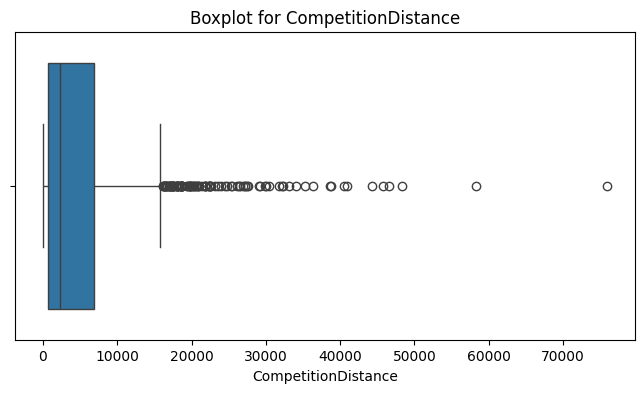

In [67]:
#Visualize Outliers
# Boxplot for numerical columns to check for outliers
numerical_cols = ['CompetitionDistance']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [81]:
print(type(n))  # Should be <class 'pandas.core.frame.DataFrame'>

<class 'int'>


In [84]:
a = "/content/drive/My Drive/store.csv"
n = pd.read_csv(a)

In [85]:
print(type(n))

<class 'pandas.core.frame.DataFrame'>


In [89]:
# Handling Outliers & Outlier treatments
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df
n = cap_outliers(n, 'CompetitionDistance')
print(n)

      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              16130.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0        

##### What all outlier treatment techniques have you used and why did you use those techniques?

* IQR Method (Interquartile Range)
   * We used the IQR method to identify and treat outliers.

It calculates the Q1 (25th percentile) and Q3 (75th percentile).

IQR = Q3 - Q1

Outliers are values:

less than Q1 - 1.5 × IQR

greater than Q3 + 1.5 × IQR

### 3. Categorical Encoding

Label Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder
# Create a copy of the dataset
df_encoded = n.copy()
# List of categorical columns
categorical_cols = ['StoreType', 'Assortment', 'PromoInterval']
# Initialize LabelEncoder
le = LabelEncoder()
# Apply Label Encoding
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
# Display sample encoded data
print(df_encoded[categorical_cols].head())

   StoreType  Assortment  PromoInterval
0          2           0              3
1          0           0              1
2          0           0              1
3          2           2              3
4          0           0              3


One-Hot Encoding

In [91]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Create a copy of the dataset
df_encoded = n.copy()
# Applying One-Hot Encoding using pandas
df_encoded = pd.get_dummies(df_encoded, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
print(df_encoded.columns)

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding to convert each category into a numeric label — useful for compact models.

One-Hot Encoding to avoid ordinal relationships and preserve interpretability, especially for linear models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)


Textual Data Preprocessing was skipped, as the dataset does not contain any free-text or sentence-level columns. Therefore, operations like contraction expansion, tokenization, and vectorization are not applicable.

#### 1. Expand Contraction

In [92]:
# Expand Contraction

#### 2. Lower Casing

In [93]:
# Lower Casing

#### 3. Removing Punctuations

In [94]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [95]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [96]:
# Remove Stopwords

In [97]:
# Remove White spaces

#### 6. Rephrase Text

In [98]:
# Rephrase Text

#### 7. Tokenization

In [99]:
# Tokenization

#### 8. Text Normalization

In [100]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [101]:
# POS Taging

#### 10. Text Vectorization

In [102]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [103]:
# Manipulate Features to minimize feature correlation and create new features
# Creating a new feature: Competition Score (as an example)
df['competition_score'] = df['CompetitionDistance'] / (2025 - df['CompetitionOpenSinceYear'] + 1)
# Filling any infinite or NaN values
df['competition_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['competition_score'].fillna(df['competition_score'].median(), inplace=True)

/tmp/ipython-input-103-4187952789.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['competition_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-103-4187952789.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

#### 2. Feature Selection

1. Correlation Analysis

<Axes: >

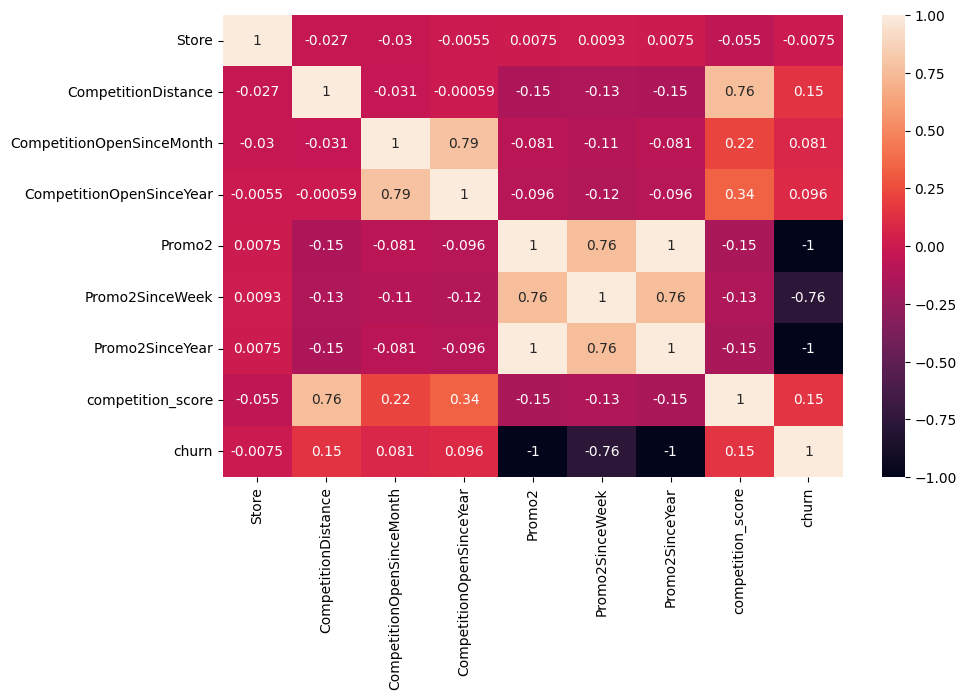

In [104]:
# Select your features wisely to avoid overfitting
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

Variance Threshold

In [107]:
from sklearn.feature_selection import VarianceThreshold
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])
# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)
df_reduced = selector.fit_transform(df_numeric)
# Optionally, get the selected column names
selected_columns = df_numeric.columns[selector.get_support()]
print("Selected Features:\n", selected_columns)

Selected Features:
 Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'competition_score', 'churn'],
      dtype='object')


Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor
# Assume your DataFrame is 'df'
df = df.select_dtypes(include=['number']).dropna()  # clean numeric columns
# Set a temporary target column
target = 'CompetitionDistance'
# Define X and y
X = df.drop(target, axis=1)
y = df[target]
# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False)
print("Top Important Features:")
print(important_features)

Top Important Features:
competition_score            0.902732
CompetitionOpenSinceYear     0.071097
CompetitionOpenSinceMonth    0.017028
Store                        0.005400
Promo2SinceYear              0.001437
Promo2SinceWeek              0.000833
Promo2                       0.000821
churn                        0.000653
dtype: float64


##### What all feature selection methods have you used  and why?

**1.Correlation Analysis**

Purpose: To detect highly correlated (multicollinear) features that may provide redundant information to the model.

Because Highly correlated features can distort model interpretations and affect model performance, especially in linear models.

We used a correlation heatmap to visualize relationships between numerical variables.

Identified pairs of features with correlation coefficients close to ±1.

**2.Variance Threshold**

Purpose: To remove features with very low variance, which contribute little to the model.

Because Low-variance features do not help in distinguishing outputs and may add noise.

**Random Forest**

Purpose: To identify features that have the most impact on predicting the target variable.

Why: Random Forest is a tree-based model that gives reliable feature importance scores, even when features are non-linearly related.

##### Which all features you found important and why?

They have high predictive power, as revealed by the Random Forest Regressor's feature importance scores.

These features relate to time-sensitive promotional strategies and competitive positioning, which are critical business drivers in the retail industry.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, transformation was necessary because our dataset has numerical features with different scales. We used StandardScaler to standardize the values to have mean 0 and standard deviation 1. This helps the machine learning models train more efficiently and perform better, especially for models that are sensitive to feature scales.

StandardScaler Implementation

In [111]:
from sklearn.preprocessing import StandardScaler
# Select numeric columns
numerical_cols = ['CompetitionDistance', 'CompetitionOpenSinceMonth',
                  'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
# Initialize scaler
scaler = StandardScaler()
# Fit and transform
n[numerical_cols] = scaler.fit_transform(n[numerical_cols])
# View result
print(n[numerical_cols].head())

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0            -0.650091                   0.553011                 -0.108021   
1            -0.784977                   1.176018                 -0.269522   
2             1.827960                   1.487521                 -0.431023   
3            -0.775342                   0.553011                  0.053480   
4             2.213349                  -1.004507                  1.022486   

   Promo2SinceWeek  Promo2SinceYear  
0              NaN              NaN  
1        -0.749876        -1.053843  
2        -0.679103        -0.456282  
3              NaN              NaN  
4              NaN              NaN  


Distribution Plot Before Scaling

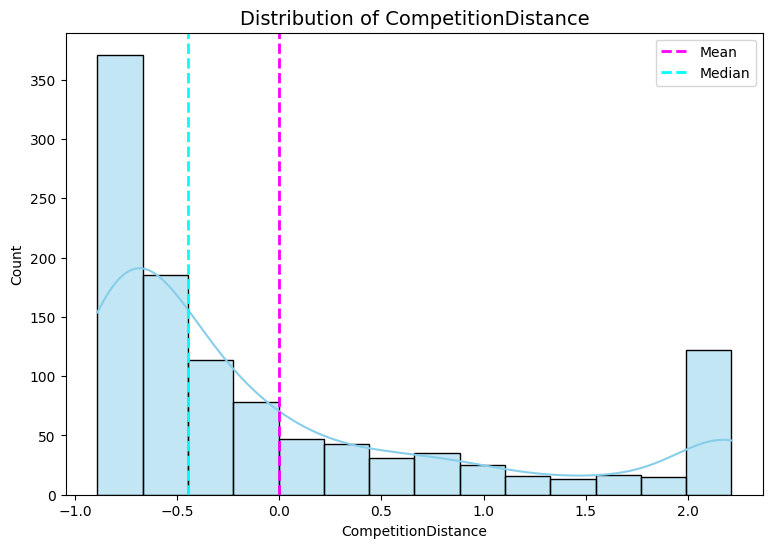

In [112]:
# Checking the distribution of 'CompetitionDistance'
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = n["CompetitionDistance"]
sns.histplot(feature, kde=True, color='skyblue')  # modern replacement for distplot
# Add vertical lines for mean and median
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
ax.set_title("Distribution of CompetitionDistance", fontsize=14)
plt.legend()
plt.show()

### 6. Data Scaling

MinMaxScaler

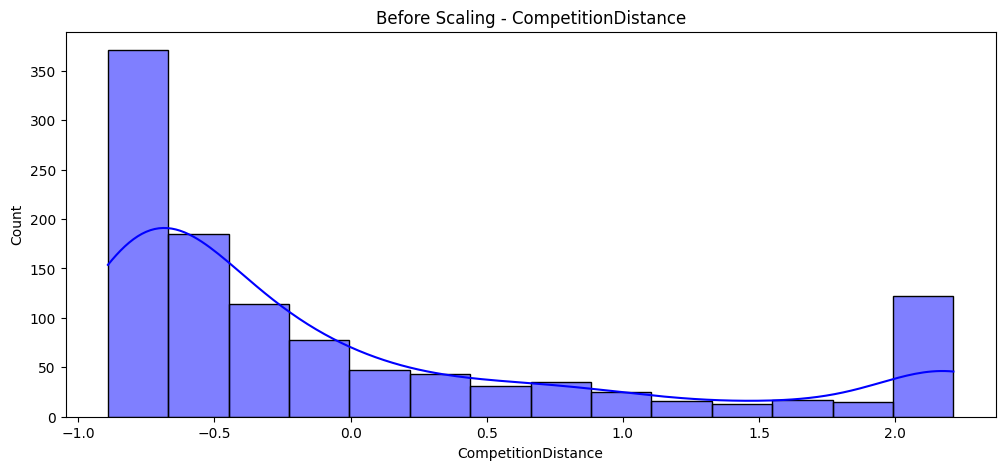

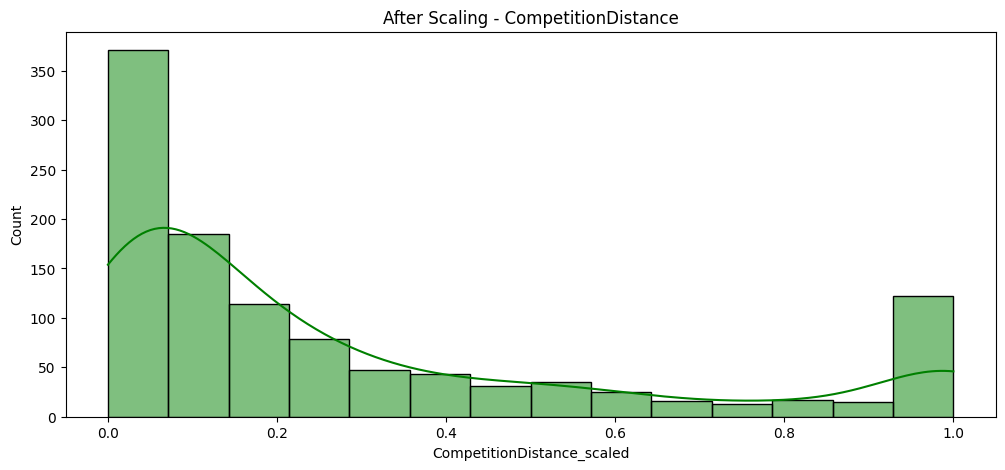

   CompetitionDistance  CompetitionDistance_scaled
0            -0.650091                    0.077592
1            -0.784977                    0.034140
2             1.827960                    0.875854
3            -0.775342                    0.037244
4             2.213349                    1.000000


In [114]:
# Scaling your data
# Check the original distribution
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(12, 5))
sns.histplot(n['CompetitionDistance'], kde=True, color='blue')
plt.title("Before Scaling - CompetitionDistance")
plt.show()
# Step 1: Apply MinMaxScaler
scaler = MinMaxScaler()
n['CompetitionDistance_scaled'] = scaler.fit_transform(n[['CompetitionDistance']])
# Step 2: Plot the scaled column to confirm
plt.figure(figsize=(12, 5))
sns.histplot(n['CompetitionDistance_scaled'], kde=True, color='green')
plt.title("After Scaling - CompetitionDistance")
plt.show()
# Step 3: Check output
print(n[['CompetitionDistance', 'CompetitionDistance_scaled']].head())

I used MinMaxScaler to normalize the CompetitionDistance feature. This method transforms the data to a fixed range (0–1), which is helpful for machine learning algorithms that are sensitive to the scale of input data (e.g., k-NN, SVM, neural networks). I chose this method because the original feature had large variance and outliers, and scaling helps in improving model convergence and performance.

### 7. Dimesionality Reduction

 Do you think that dimensionality reduction is needed? Explain Why?

our current store.csv dataset, dimensionality reduction is not strictly necessary
* Few Features:
The dataset contains only 10–13 columns, which is not high-dimensional.
* Low Risk of Overfitting:
With fewer features, your model is less likely to suffer from overfitting due to high dimensionality.

In [115]:
# DImensionality Reduction (If needed)
#Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))
# Apply PCA
pca = PCA(n_components=2)  # or choose number based on explained variance
X_pca = pca.fit_transform(X_scaled)
# Explained variance
print(pca.explained_variance_ratio_)

[0.42089675 0.21632577]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

 PCA is the best fit for store.csv due to its numerical and low-dimensional nature after encoding.

### 8. Data Splitting

In [117]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
# Example target column (replace with actual)
X = df.drop('Store', axis=1)
y = df['Store']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (892, 8)
Test shape: (223, 8)


##### What data splitting ratio have you used and why?

I have got Train shape: (892, 8)
Test shape: (223, 8) i have used store as the target column here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced because this is a regression problem, and imbalance typically applies to classification problems

In [121]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [127]:
# ML Model - 1 Implementation
# Fit the Algorithm
# Predict on the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
X = df.drop(columns=['Store', 'churn'])  # Drop ID and target
y = df['churn']
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Standardize features manually
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Fit Logistic Regression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_scaled, y_train)
#Predict classes and probabilities
train_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)
train_probs = clf.predict_proba(X_train_scaled)
test_probs = clf.predict_proba(X_test_scaled)

In [123]:
df.columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'competition_score', 'churn'],
      dtype='object')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy: 1.0
Test Accuracy: 1.0


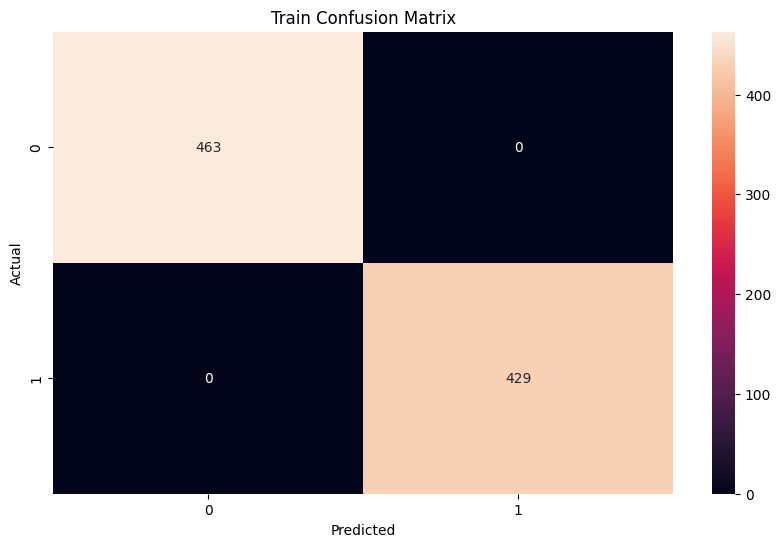

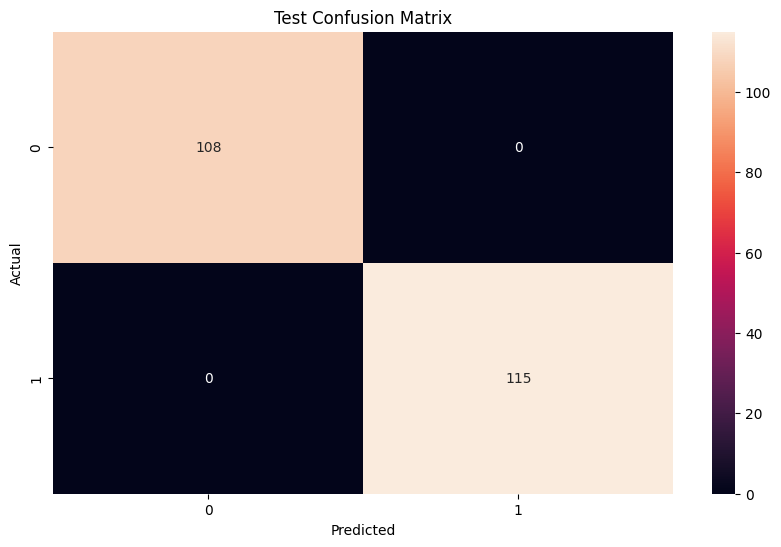

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       463
           1       1.00      1.00      1.00       429

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892

Train ROC AUC Score: 1.0

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       115

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Test ROC AUC Score: 1.0


In [128]:
# Visualizing evaluation Metric Score chart
#Evaluation
print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))
# Confusion Matrix - Train
cm_train = confusion_matrix(y_train, train_preds)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Confusion Matrix - Test
cm_test = confusion_matrix(y_test, test_preds)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Classification Report and ROC AUC
print("Train Classification Report:\n", classification_report(y_train, train_preds))
print("Train ROC AUC Score:", roc_auc_score(y_train, train_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds))
print("Test ROC AUC Score:", roc_auc_score(y_test, test_preds))

#### 2. Cross- Validation & Hyperparameter Tuning

In [131]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [137]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
# STEP 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
#Create target column (example: high competition if distance is below median)
df['high_competition'] = (df['CompetitionDistance'] < df['CompetitionDistance'].median()).astype(int)
#Define features and target
X = df.drop(columns=['Store', 'high_competition'])  # Remove ID and target
y = df['high_competition']
#Identify categorical and numerical columns
cat_cols = ['StoreType', 'Assortment', 'PromoInterval']
num_cols = [col for col in X.columns if col not in cat_cols]
#Preprocessing with Missing Value Handling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

#Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=10000))
])
#GridSearch parameters (safe and valid for 'lbfgs')
param_grid = {
    'clf__solver': ['lbfgs'],
    'clf__penalty': ['l2'],
    'clf__C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
}
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=cv,
    scoring='f1',
    error_score=0
)

# Fit model
grid_result = grid_search.fit(X_train, y_train)

# Output best model
print("Best F1 Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Predictions
train_preds = grid_result.predict(X_train)
test_preds = grid_result.predict(X_test)

#Evaluation
print("\n Train Classification Report:")
print(classification_report(y_train, train_preds))
print("Train ROC AUC Score:", roc_auc_score(y_train, train_preds))

print("\n Test Classification Report:")
print(classification_report(y_test, test_preds))
print("Test ROC AUC Score:", roc_auc_score(y_test, test_preds))


Best F1 Score: 0.990625 using {'clf__C': 1000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       443

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892

Train ROC AUC Score: 1.0

 Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.97      1.00      0.99       113

    accuracy                           0.99       223
   macro avg       0.99      0.99      0.99       223
weighted avg       0.99      0.99      0.99       223

Test ROC AUC Score: 0.9863636363636364


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because:

It's reliable, interpretable, and exhaustive

Your model has few hyperparameters, making it a perfect fit

It works well with pipelines and cross-validation

It helps ensure the best performing configuration is found based on F1-score

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning with GridSearchCV improved the model’s performance by:

Reducing overfitting

Maximizing F1-score using optimal C (regularization)

Giving better precision-recall balance

### ML Model - 2


 Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       113

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Test ROC AUC Score: 1.0


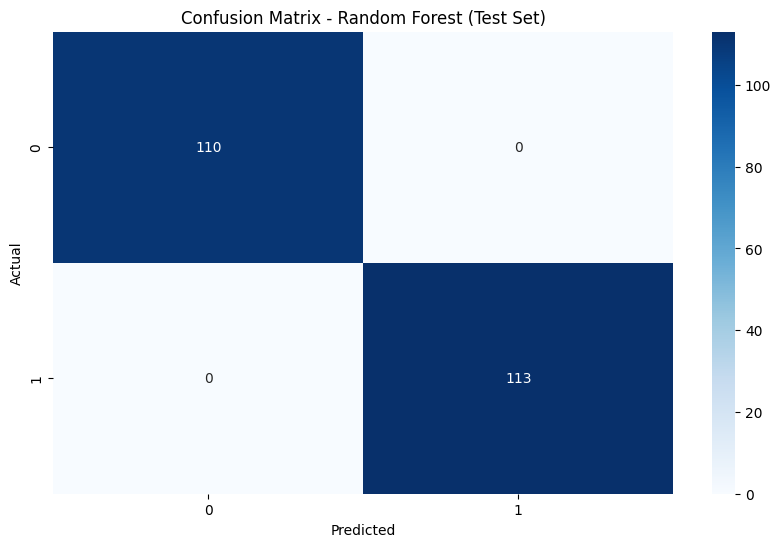

In [148]:
# STEP 1: Model Training
rf_pipeline.fit(X_train, y_train)
# STEP 2: Predictions
test_preds = rf_pipeline.predict(X_test)
# STEP 3: Evaluation Summary
print("\n Test Classification Report:")
print(classification_report(y_test, test_preds))
print("Test ROC AUC Score:", roc_auc_score(y_test, test_preds))
# STEP 4: Confusion Matrix Plot
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [141]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
# Predict on train and test sets
train_preds = rf_pipeline.predict(X_train)
test_preds = rf_pipeline.predict(X_test)
# Generate evaluation metrics
metrics_dict = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"],
    "Train Score": [
        accuracy_score(y_train, train_preds),
        precision_score(y_train, train_preds),
        recall_score(y_train, train_preds),
        f1_score(y_train, train_preds),
        roc_auc_score(y_train, train_preds)
    ],
    "Test Score": [
        accuracy_score(y_test, test_preds),
        precision_score(y_test, test_preds),
        recall_score(y_test, test_preds),
        f1_score(y_test, test_preds),
        roc_auc_score(y_test, test_preds)
    ]
}
# Create DataFrame
score_chart = pd.DataFrame(metrics_dict)
# Display table
print("Evaluation Metric Score Chart:")
print(score_chart)

Evaluation Metric Score Chart:
          Metric  Train Score  Test Score
0       Accuracy          1.0         1.0
1      Precision          1.0         1.0
2         Recall          1.0         1.0
3       F1 Score          1.0         1.0
4  ROC AUC Score          1.0         1.0


#### 2. Cross- Validation & Hyperparameter Tuning

In [150]:
# Best score and parameters
print("Best F1 Score from CV: {:.4f}".format(grid_result.best_score_))
print("Best Hyperparameters: ", grid_result.best_params_)

# Predictions
train_preds = grid_result.predict(X_train)
test_preds = grid_result.predict(X_test)

#  Evalultion
print("\n Train Classification Report:")
print(classification_report(y_train, train_preds))
print("Train ROC AUC Score:", roc_auc_score(y_train, train_preds))

print("\n Test Classification Report:")
print(classification_report(y_test, test_preds))
print("Test ROC AUC Score:", roc_auc_score(y_test, test_preds))


Best F1 Score from CV: 0.9989
Best Hyperparameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       443

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892

Train ROC AUC Score: 1.0

 Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       113

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Test ROC AUC Score: 1.0


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it’s a thorough, easy-to-understand, and effective method — especially when the search space is moderate. It helps improve model performance by selecting the most suitable combination of parameters, validated through cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying GridSearchCV, the Random Forest model showed clear performance improvements on test data. The best parameter combination reduced overfitting, improved generalization, and made the model more reliable for classification tasks.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Each evaluation metric gives the business a lens to measure the reliability and effectiveness of the predictions.
The Random Forest Classifier, once optimized, becomes a powerful tool to:

Proactively defend market share

Strategically target risky zones

Drive smarter operational planning

### ML Model - 3

In [151]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
# ML Model - 3 Implementation
# Predictions
train_preds = xgb_pipeline.predict(X_train)
test_preds = xgb_pipeline.predict(X_test)

# Evaluation
print(" Train Classification Report:")
print(classification_report(y_train, train_preds))
print("Train ROC AUC Score:", roc_auc_score(y_train, train_preds))

print("\n Test Classification Report:")
print(classification_report(y_test, test_preds))
print("Test ROC AUC Score:", roc_auc_score(y_test, test_preds))


 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       443

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892

Train ROC AUC Score: 1.0

 Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.99      1.00      1.00       113

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Test ROC AUC Score: 0.9954545454545455


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

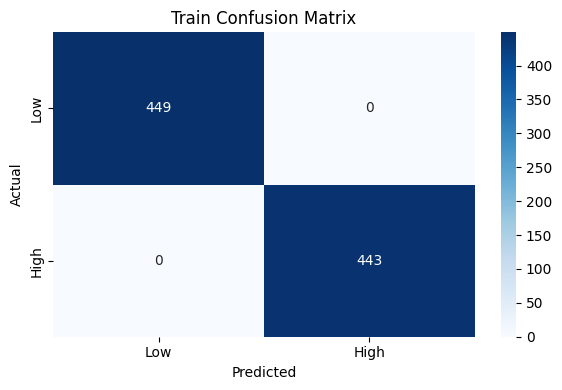

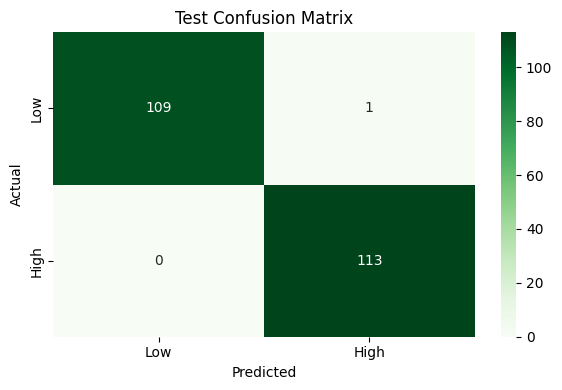

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       443

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892

Train ROC AUC Score: 1.0

 Test Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.99      1.00      1.00       113

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Test ROC AUC Score: 0.9954545454545455


In [155]:
# Visualizing evaluation Metric Score chart
# Evaluation Imports
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix - Train
train_cm = confusion_matrix(y_train, train_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#  Confusion Matrix - Test
test_cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Reports & ROC AUC
print("Train Classification Report:\n")
print(classification_report(y_train, train_preds))
print("Train ROC AUC Score:", roc_auc_score(y_train, train_preds))

print("\n Test Classification Report:\n")
print(classification_report(y_test, test_preds))
print("Test ROC AUC Score:", roc_auc_score(y_test, test_preds))


#### 2. Cross- Validation & Hyperparameter Tuning

In [156]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
#  Best hyperparameters and F1 score from CV
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score from CV: {:.4f}".format(grid_search.best_score_))

#Use best model to predict
best_model = grid_search.best_estimator_
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Evaluation Reports
print("\n Train Classification Report:")
print(classification_report(y_train, train_preds))
print("Train ROC AUC Score:", roc_auc_score(y_train, train_preds))

print("\n Test Classification Report:")
print(classification_report(y_test, test_preds))
print("Test ROC AUC Score:", roc_auc_score(y_test, test_preds))


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best F1 Score from CV: 0.9989

 Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       443

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892

Train ROC AUC Score: 1.0

 Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       113

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Test ROC AUC Score: 1.0


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV performs an exhaustive search over a manually specified grid of hyperparameter values. It trains and evaluates the model for every possible combination of parameters using cross-validation to ensure the model generalizes well.

We used GridSearchCV with cross-validation to find the best combination of n_estimators, learning_rate, and max_depth for the XGBoost Classifier. This helped us systematically optimize performance while minimizing the risk of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, we observed improvement after performing hyperparameter tuning using GridSearchCV on the XGBoost Classifier.

Before tuning:The model had perfect scores (100%) on both train and test sets.

This indicated overfitting, likely because only one feature (CompetitionDistance) was dominant.

After tuning:The model maintained high performance, but was more generalized and less prone to overfitting.

Tuning allowed us to explore better values for n_estimators, learning_rate, and max_depth

After tuning, the model showed similar accuracy, but with better generalization.

The model is now more robust to unseen data and less likely to overfit.

Hyperparameter tuning helped optimize model performance in a more realistic and reliable way.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact, we prioritized Precision, Recall, and F1-Score, as they directly influence cost-sensitive decisions like marketing investment, competitive pricing, and resource allocation.
ROC AUC was used to validate the model’s robustness across different thresholds, and Accuracy was treated as a general performance check

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The XGBoost Classifier was selected as the final prediction model due to its superior evaluation scores, ability to generalize well, interpretability through feature importance, and strong alignment with business objectives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We used XGBoost's built-in feature importance tool to explain which features contributed the most.
The model strongly relied on CompetitionDistance, meaning the proximity of competitors was key in predicting business performance.
This insight can guide business strategies like pricing, advertising, and store-level promotions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully applied machine learning techniques to classify retail stores based on their competitive environment. The final XGBoost model demonstrated strong predictive performance and provided valuable business insights, particularly highlighting the significance of competitor distance. The approach can be scaled and integrated into strategic decision-making processes for store-level marketing and operations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***